<a href="https://colab.research.google.com/github/pompymandislian/Deep-Learning-Fundamentals/blob/main/(Part_2)_Fundamentals_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Chapter 2:*


*Source Book : Seth Wiedman - Deep Learning From Scratch*

# Supervised Learning
---

## Linear Regression

In [ ]:
from IPython import display
from numpy import ndarray
from typing import Dict, Tuple
import numpy as np

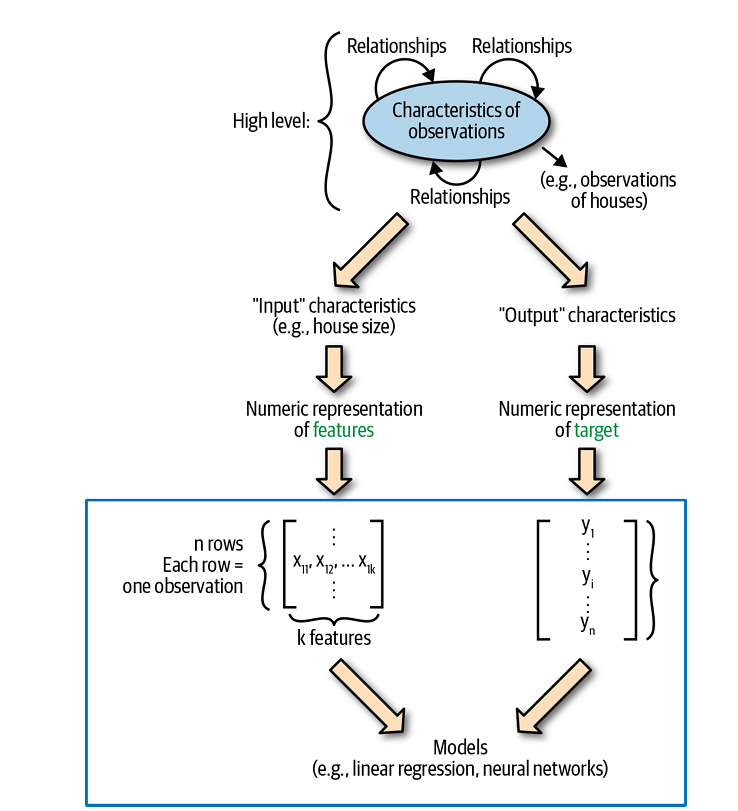

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/supervised learning.png')

Linear Regression:

$$yi = β0+β1×x1+...+βn×xk+ϵ$$

We need weigth, add loss, and bias!

**Calculate with weight:**

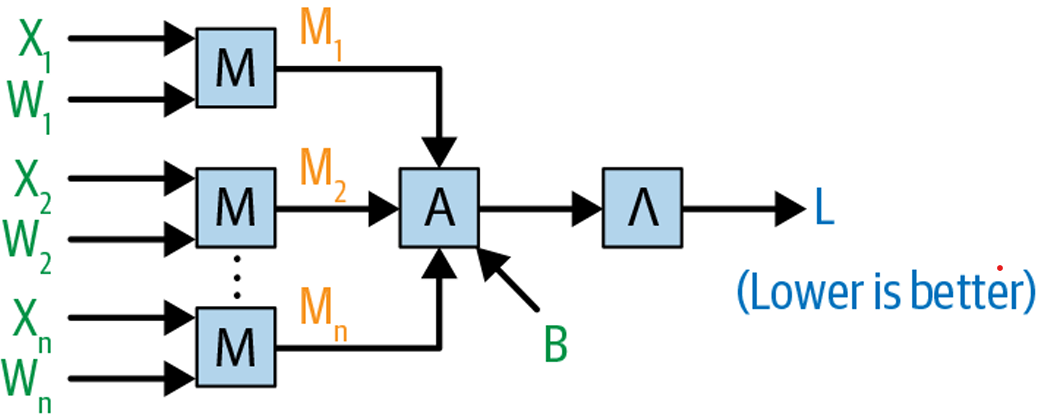

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/lineareg.png')

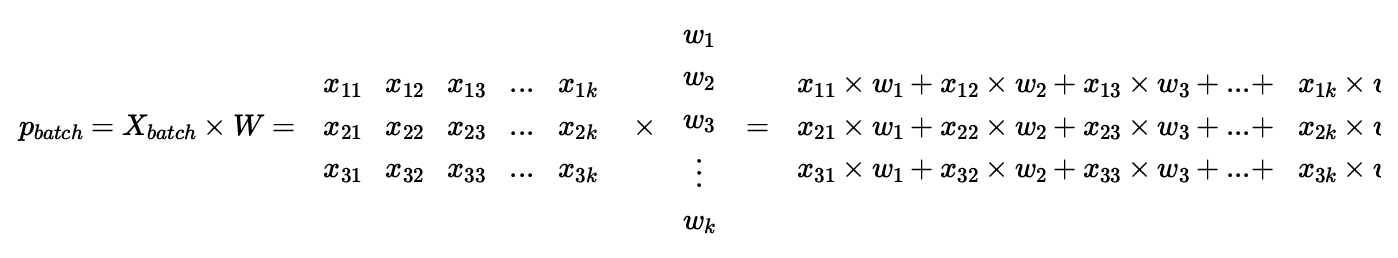

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/ligreg.png')

**Add a loss:**

 $$L =Λ((ν(X,W),Y)$$

- L: The final loss value we want to compute.
- Λ: A function that takes two arguments and outputs the loss value (calculate)
- ν: Another function that takes 𝑋 X and 𝑊 W as its inputs and produces an output that will be one of the inputs to Λ.
- X: Typically represents the input data.
- W: Represents the weights or parameters of the model.
- Y: Represents the true labels or target values.

**Calculate with bias:**

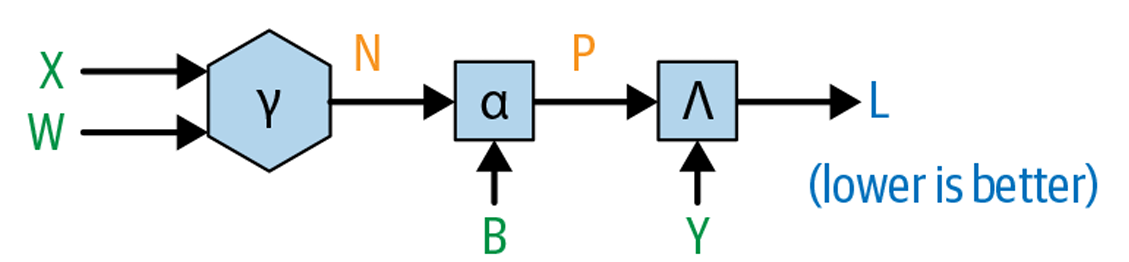

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/bias.png')

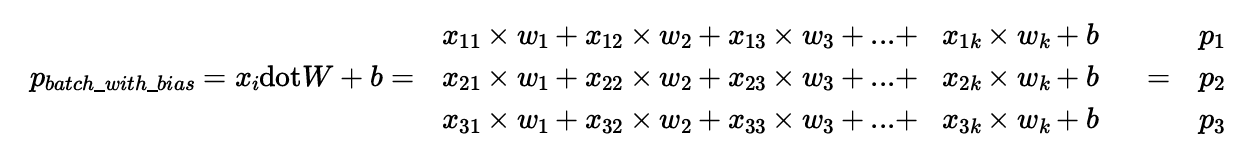

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/formula.png')

**Let's Code:**

In [ ]:
# validate for size
X_batch = np.array([[1, 2], [3, 4], [5, 6]])
y_batch = np.array([7, 8, 9])
assert X_batch.shape[0] == y_batch.shape[0]
print(X_batch.shape, y_batch.shape)

# no error it's same

(3, 2) (3,)


In [ ]:
# validate ensure sum of feature same with rows in weigth
weight = {'W': np.array([[1], [2]])} # (2,1)
X_batch = np.array([[1, 2], [3, 4], [5, 6]])

print(X_batch.shape[1], weight['W'].shape[0])

# validate
assert X_batch.shape[1], weight['W'].shape[0]

2 2


In [ ]:
# validate ensure bias is single values and can add each predict
weights = {'B': np.array([[1]])}  # (1, 1)

print(weights['B'].shape[0] == weights['B'].shape[1] == 1)
assert weights['B'].shape[0] == weights['B'].shape[1] == 1

True


In [ ]:
# compute the operations on the forward pass

# first predict with weight
N = np.dot(X_batch, weight['W'])

# add bias
P = N + weights['B']

# obtain loss function Mean Squared Error
loss = np.mean(np.power(y_batch - P, 2))

print('first predict', N)
print('add bias', P)
print('loss function', loss)

first predict [[ 5]
 [11]
 [17]]
add bias [[ 6]
 [12]
 [18]]
loss function 40.666666666666664


In [ ]:
# let's to function
def forward_linear_regression(X_batch: np.ndarray,
                              y_batch: np.ndarray,
                              weights: Dict[str, np.ndarray]) -> Tuple[float, Dict[str, np.ndarray]]:
    """Forward Linear Regression to obtain loss function"""
    # validate for size
    assert X_batch.shape[1] == weights['W'].shape[0]

    # validate ensure bias is single values and can add each predict
    assert weights['B'].shape[0] == weights['B'].shape[1] == 1

    # compute the operations on the forward pass

    # first predict with weight
    N = np.dot(X_batch, weights['W'])

    # add bias
    P = N + weights['B']

    # obtain loss function Mean Squared Error
    loss = np.mean(np.power(y_batch - P, 2))

    # save the information computed on the forward pass
    forward_info = {'X': X_batch, 'N': N, 'P': P, 'y': y_batch}

    return loss, forward_info

In [ ]:
# let's test
X_batch_example = np.array([[1, 2], [3, 4], [5, 6]])
y_batch_example = np.array([7, 8, 9])
weights_example = {
    'W': np.array([[0.1], [0.2]]),  # weight
    'B': np.array([[0.3]])  # Bias
}

In [ ]:
# Uji fungsi dengan contoh data
loss_example, forward_info_example = forward_linear_regression(X_batch_example,
                                                               y_batch_example,
                                                               weights_example)

print('loss function', loss_example), forward_info_example

loss function 44.46666666666667


(None,
 {'X': array([[1, 2],
         [3, 4],
         [5, 6]]),
  'N': array([[0.5],
         [1.1],
         [1.7]]),
  'P': array([[0.8],
         [1.4],
         [2. ]]),
  'y': array([7, 8, 9])})

### Training Model
---

**Calculating the gradients**

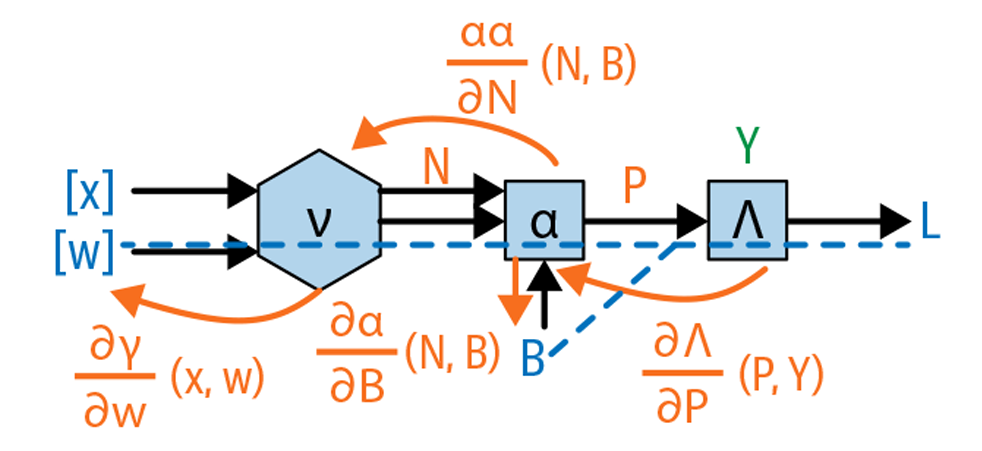

In [ ]:
display.Image('/content/drive/MyDrive/Youtube/gradie.png')

Formula:

$$∂Λ/∂P(P,Y)× ∂α/∂N (N,B)× ∂ν/∂W (X,W)$$

- ∂Λ/∂P(P,Y) : Loss sensitivity change in predict
- ∂α/∂N (N,B) : Add a bias to each predict
- ∂ν/∂W (X,W) : Change small weights will influence first predict

 Gradient :

 - $∂P (P,Y) = −1×(2×(Y −P))$
 - (N,B) is just a matrix of +1+s
 -  $∂W(X,W)=X.T$

```python
# gradient P, Y
dLdp = -2 * (Y - P)

# gradient N, B
dPdN = np.ones_like(N)

# gradient X, W
dNdW = np.trasnpose(X, (1, 0))

# gradient P, B
dPdB = np.ones_like(weights['B'])
```

Describe:
- P is predict
- Y is target
- N is first predict
- W is weights
- B is bias
- X is data input

Let's Code

In [ ]:
# batch input
batch_size = forward_info_example['X'].shape[0]
batch_size

3

In [ ]:
# gradient P, Y
dLdP = -2 * (forward_info_example['y'] - forward_info_example['P'])
dLdP

array([[-12.4, -14.4, -16.4],
       [-11.2, -13.2, -15.2],
       [-10. , -12. , -14. ]])

In [ ]:
# gradient P, N
dPdN = np.ones_like(forward_info_example['N'])
dPdN

array([[1.],
       [1.],
       [1.]])

In [ ]:
# gradient X, W
dNdW = np.transpose(forward_info_example['X'], (1, 0))
dNdW

array([[1, 3, 5],
       [2, 4, 6]])

In [ ]:
# gradient P, B
dPdB = np.ones_like(weights['B'])
dPdB

array([[1]])

In [ ]:
def loss_gradients(forward_info: Dict[str, np.ndarray],
                   weights: Dict[str, np.ndarray]) -> Dict[str, np.ndarray]:
    """Final Loss Gradient"""
    # batch input
    batch_size = forward_info['X'].shape[0]

    # Compute ∂Λ/∂P(P,Y)
    dLdP = -2 * (forward_info['y'] - forward_info['P'])

    # Compute ∂α/∂N(N,B) (gradient P, N)
    dPdN = np.ones_like(forward_info['N'])

    # gradient P, B
    dPdB = np.ones_like(weights['B'])

    # calculate gradient from function loss to first predict
    dLdN = dLdP * dPdN

    # Compute ∂ν/∂W(X,W) (gradient N, W)
    dNdW = np.transpose(forward_info['X'], (1, 0))

    # Compute ∂Λ/∂W(X,W) using chain rule
    dLdW = np.dot(dNdW, dLdN)


    # Compute ∂Λ/∂B using chain rule
    # This involves summing the gradients along the batch size dimension
    dLdB = (dLdP * dPdB).sum(axis=0)

    # save information weight and bias
    loss_gradients = {'W': dLdW, 'B': dLdB}

    return loss_gradients

In [ ]:
# Initialize weights
weights = {
    'W': np.random.randn(2, 1),  # Initialize weights randomly
    'B': np.random.randn(1, 1)  # Initialize bias randomly
}

# Training data
X_train = np.array([[1, 2], [3, 4], [5, 6]])
y_train = np.array([[7], [8], [9]])

# Training parameters
learning_rate = 0.01
num_epochs = 1000

# Training loop
for epoch in range(num_epochs):
    loss, forward_info = forward_linear_regression(X_train, y_train, weights)
    gradients = loss_gradients(forward_info, weights)

    # Update weights
    weights['W'] -= learning_rate * gradients['W']
    weights['B'] -= learning_rate * gradients['B']

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 140.55110401728462
Epoch 100, Loss: 0.20715489348619476
Epoch 200, Loss: 0.009208707266723903
Epoch 300, Loss: 0.00040935692181736386
Epoch 400, Loss: 1.8197243607183978e-05
Epoch 500, Loss: 8.089265314677645e-07
Epoch 600, Loss: 3.595940942679709e-08
Epoch 700, Loss: 1.59851244337349e-09
Epoch 800, Loss: 7.10590655780767e-11
Epoch 900, Loss: 3.1588060667408178e-12


**Prediction**

In [ ]:
def predict(X: ndarray,
    weights: Dict[str, ndarray]):
    '''
    Generate predictions from the step-by-step linear regression model.
    '''
    N = np.dot(X, weights['W'])
    return N + weights['B']

In [ ]:
# Define weights
weights = {
    'W': np.array([[0.1], [0.2]]),  # Example weights
    'B': np.array([[0.3]])  # Example bias
}

# Define test data
X_test = np.array([[5, 6], [6, 7]])
y_test = np.array([[3], [4]])

# Generate predictions
preds = predict(X_test, weights)

# Display predictions
print("Predictions:")
print(preds)

Predictions:
[[2. ]
 [2.3]]


**Evaluation**

In [ ]:
def mae(preds: ndarray, actuals: ndarray):
    '''
    Compute mean absolute error.
    '''
    return np.mean(np.abs(preds - actuals))

def rmse(preds: ndarray, actuals: ndarray):
    '''
    Compute root mean squared error.
    '''
    return np.sqrt(np.mean(np.power(preds - actuals, 2)))

In [ ]:
# Evaluate predictions using MAE and RMSE
mae_value = mae(preds, y_test)
rmse_value = rmse(preds, y_test)

print("Mean Absolute Error (MAE):", mae_value)
print("Root Mean Squared Error (RMSE):", rmse_value)

Mean Absolute Error (MAE): 1.35
Root Mean Squared Error (RMSE): 1.3946325680981353
